In [26]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [7]:
path = '/storage/data/sidbot/'

In [9]:
fns = get_image_files(path)
fns

(#613) [Path('/storage/data/sidbot/sid/IMG_2168.PNG'),Path('/storage/data/sidbot/sid/IMG_0015.JPG'),Path('/storage/data/sidbot/sid/IMG_2734.JPG'),Path('/storage/data/sidbot/sid/IMG_2164.PNG'),Path('/storage/data/sidbot/sid/IMG_2742.JPG'),Path('/storage/data/sidbot/sid/IMG_3857.jpg'),Path('/storage/data/sidbot/sid/IMG_2719.JPG'),Path('/storage/data/sidbot/sid/IMG_0149.jpg'),Path('/storage/data/sidbot/sid/IMG_3194.JPG'),Path('/storage/data/sidbot/sid/IMG_0947.JPG')...]

In [10]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [11]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = images.dataloaders(path)

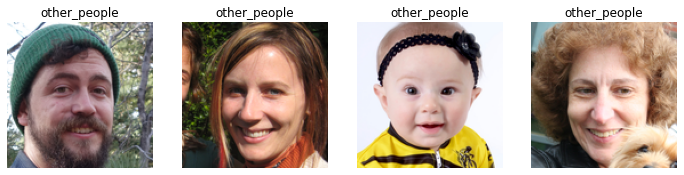

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
images = images.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = images.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4, 10e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.834459,0.864257,0.286885,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.243133,10.730008,0.770492,00:09
1,0.137317,0.121725,0.016393,00:10
2,0.091873,0.104097,0.016393,00:10
3,0.069040,0.011518,0.008197,00:10


SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=6.309573450380412e-07)

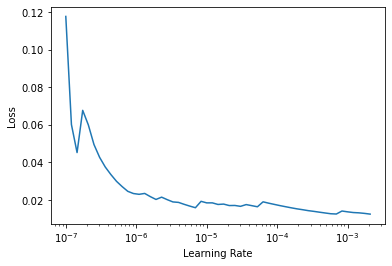

In [21]:
learn.lr_find()

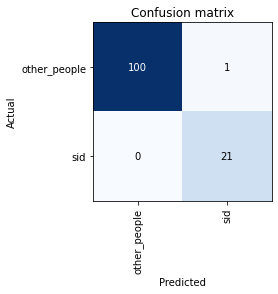

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

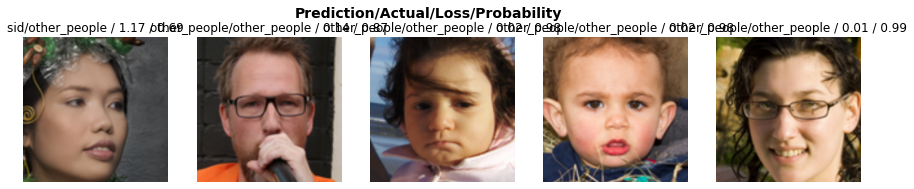

In [23]:
interp.plot_top_losses(5, nrows=1)

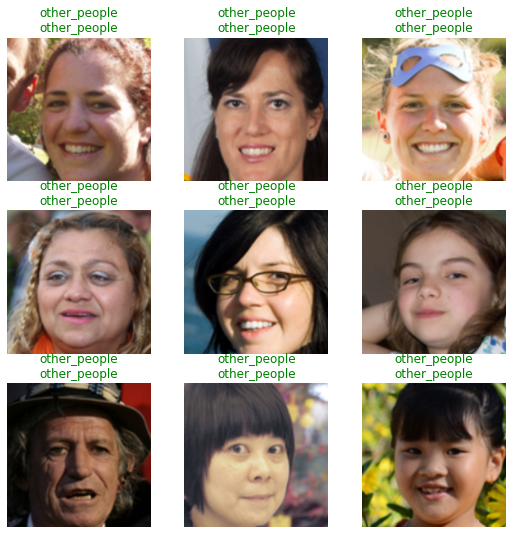

In [24]:
learn.show_results()

In [27]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
learn.export()

In [29]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [30]:
learn_inf = load_learner(path/'export.pkl')

In [31]:
learn_inf.dls.vocab

['other_people', 'sid']

In [32]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [33]:
img = PILImage.create(btn_upload.data[-1])

In [34]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [35]:
pred,pred_idx,probs = learn_inf.predict(img)

In [36]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: sid; Probability: 1.0000')

In [38]:
btn_run = widgets.Button(description='Sid or Someone else?')
btn_run

Button(description='Sid or Someone else?', style=ButtonStyle())

In [39]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [40]:
btn_upload = widgets.FileUpload()

In [41]:
VBox([widgets.Label('Upload a picture of someone!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [42]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 1.9 MB 737 kB/s eta 0:00:01
     |████████████████████████████████| 196 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 339 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.4 MB/s eta 0:00:011
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.0.18 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
      voila 0.2.4 OK
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading 